In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
tt= pd.read_csv("Titanic.csv")
tt.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tt.shape

(891, 12)

In [6]:
tt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
tt.drop('Cabin',axis=1,inplace=True)

In [8]:
tt['Age'].fillna(np.mean(tt['Age']),inplace=True)

In [9]:
tt.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
tt.Embarked.fillna('S', inplace=True)

In [11]:
tt.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encode= LabelEncoder()
tt['Sex']= encode.fit_transform(tt['Sex'])

In [14]:
X= tt[['Pclass','Sex','Age','Fare']]
Y= tt['Survived']

In [15]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X,Y,test_size=0.2)

model = LogisticRegression()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_ts)

print("The accuracy of Logistic Regression is:", accuracy_score(y_ts, y_pred)*100)

The accuracy of Logistic Regression is: 81.00558659217877


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model=DecisionTreeClassifier()
model.fit(x_tr,y_tr)
y_prd= model.predict(x_ts)

In [18]:
print("accuracy if Decision Tree is:",accuracy_score(y_ts,y_prd)*100)

accuracy if Decision Tree is: 75.41899441340783


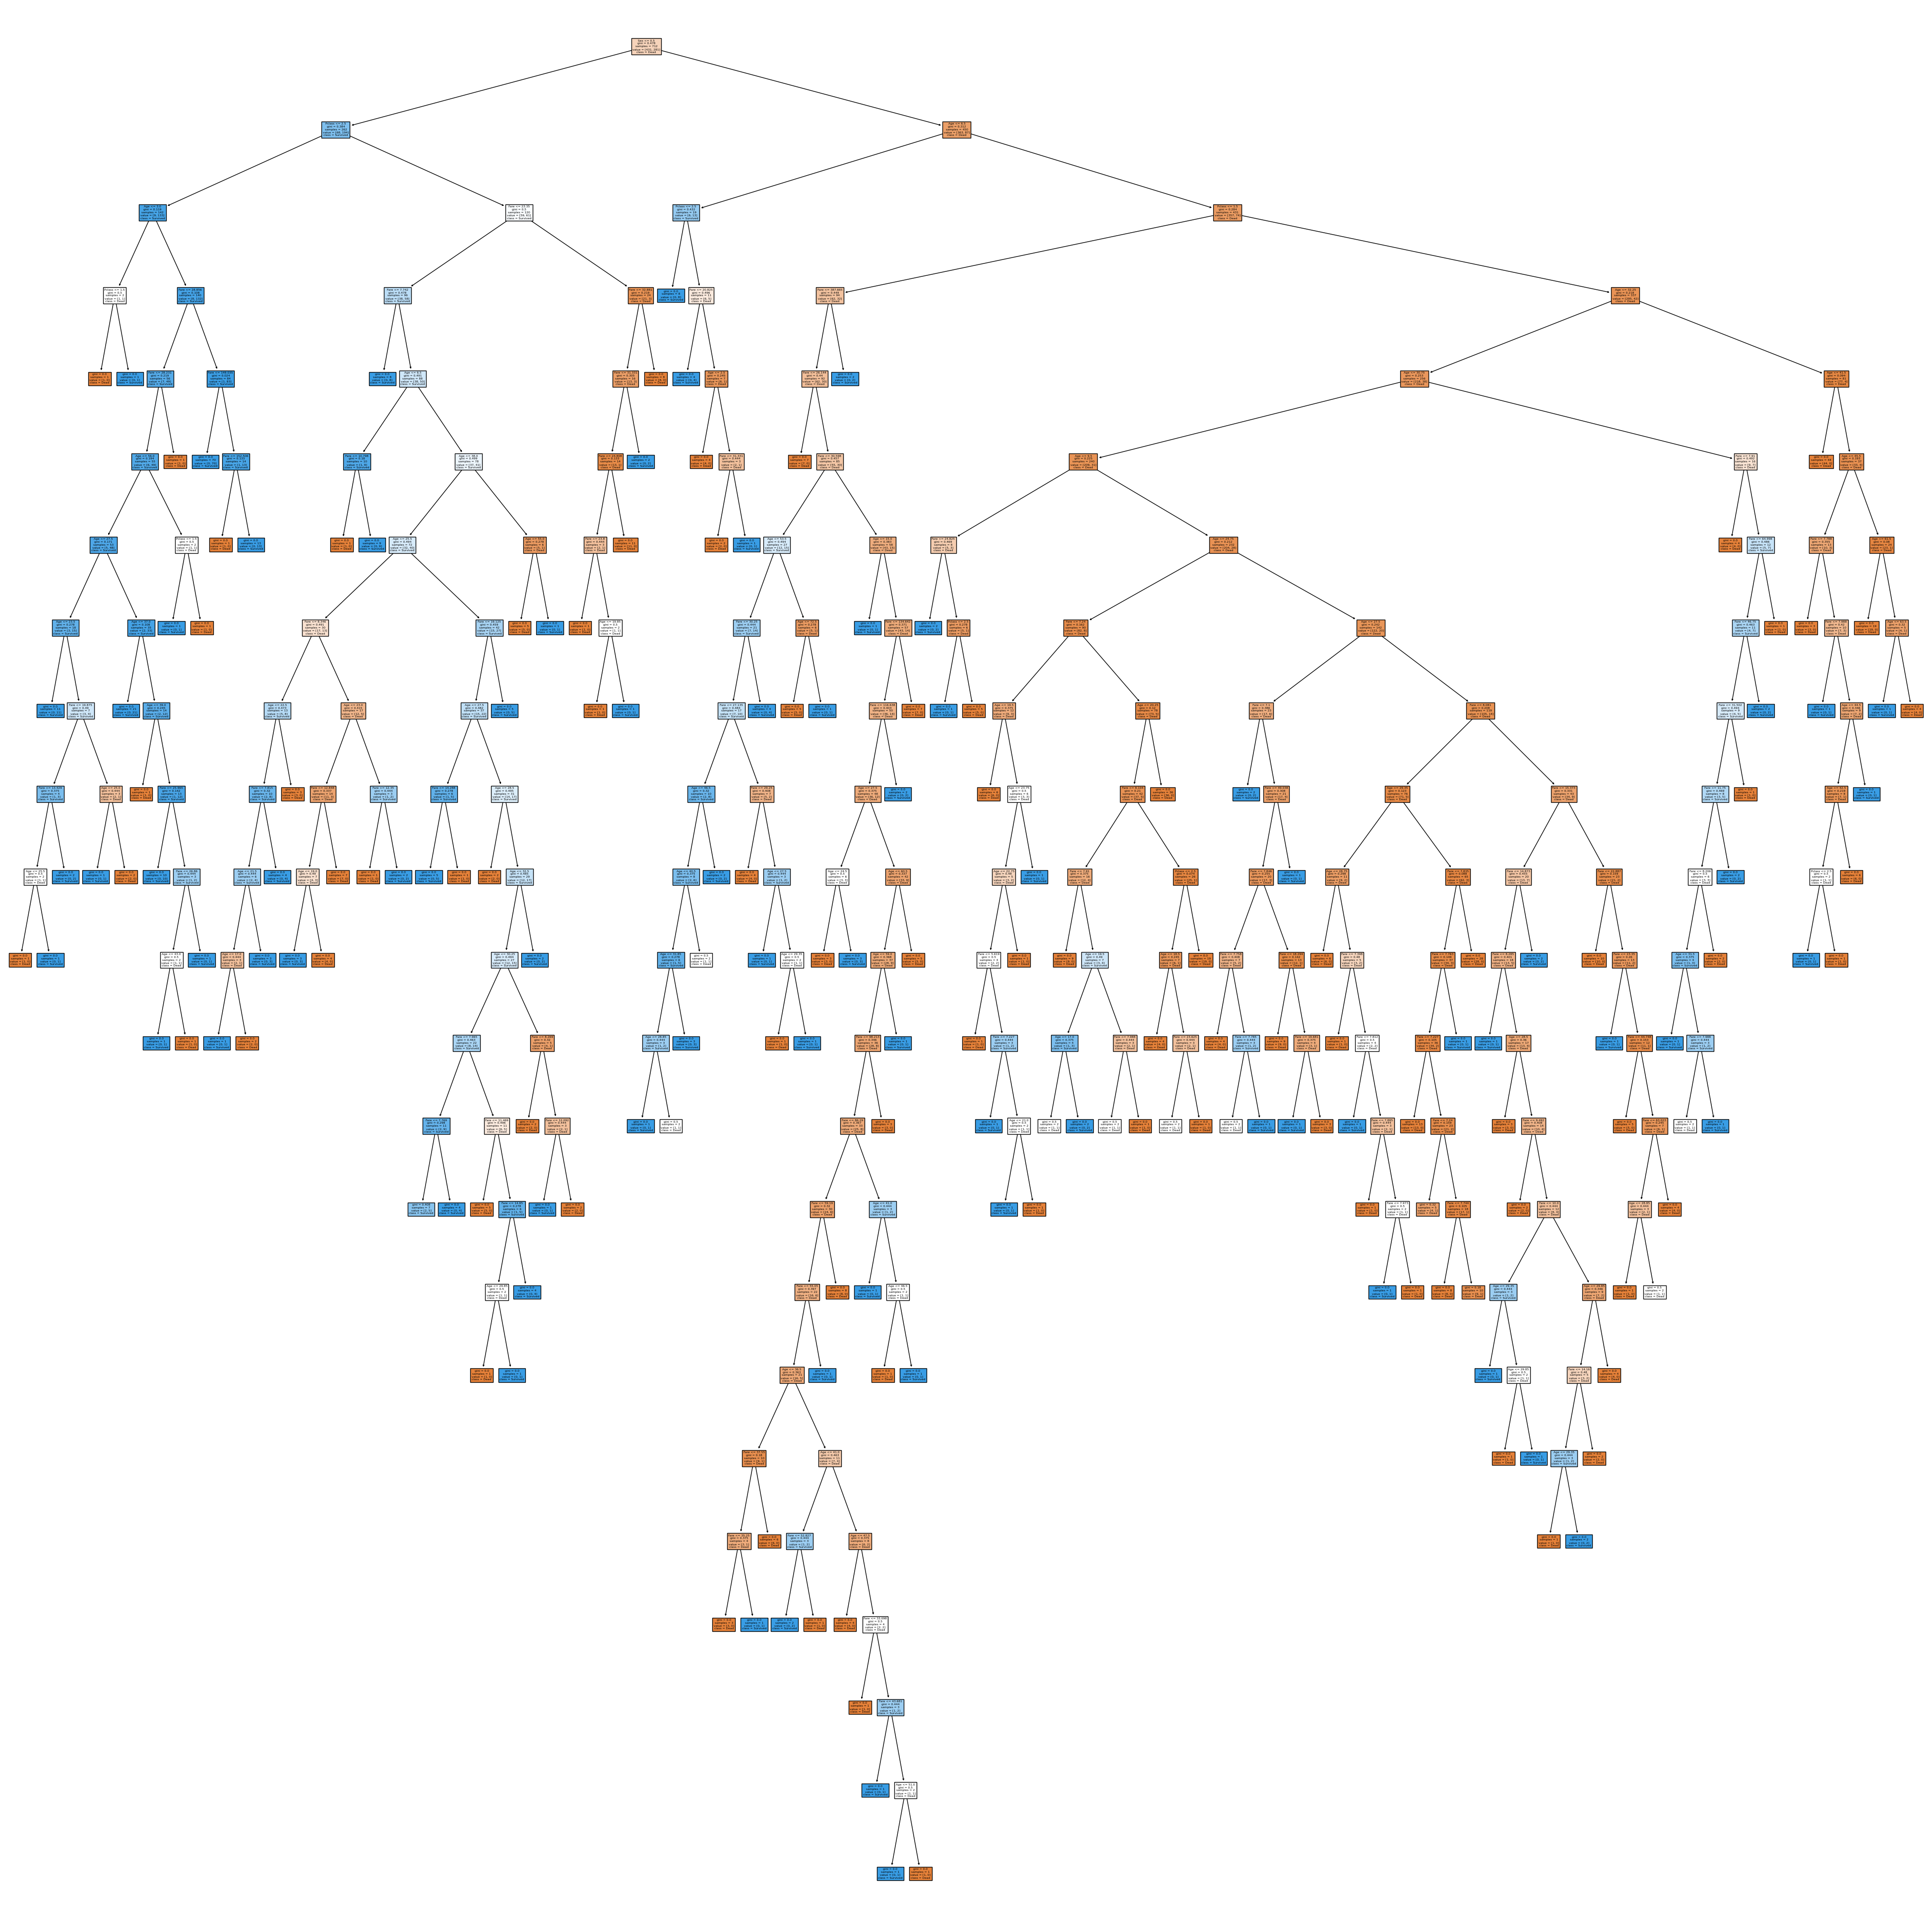

In [19]:
from sklearn import tree
fig= plt.figure(figsize=(50,50))
features= X.columns
classes= ['Dead','Survived']
tree.plot_tree(model,feature_names=features,class_names=classes,filled= True)
plt.show()

In [20]:
model= DecisionTreeClassifier(max_depth=5)
model.fit(x_tr,y_tr)
y_prd= model.predict(x_ts)
print('the accuracy of decision tree is:',accuracy_score(y_ts,y_prd)*100)

the accuracy of decision tree is: 83.79888268156425


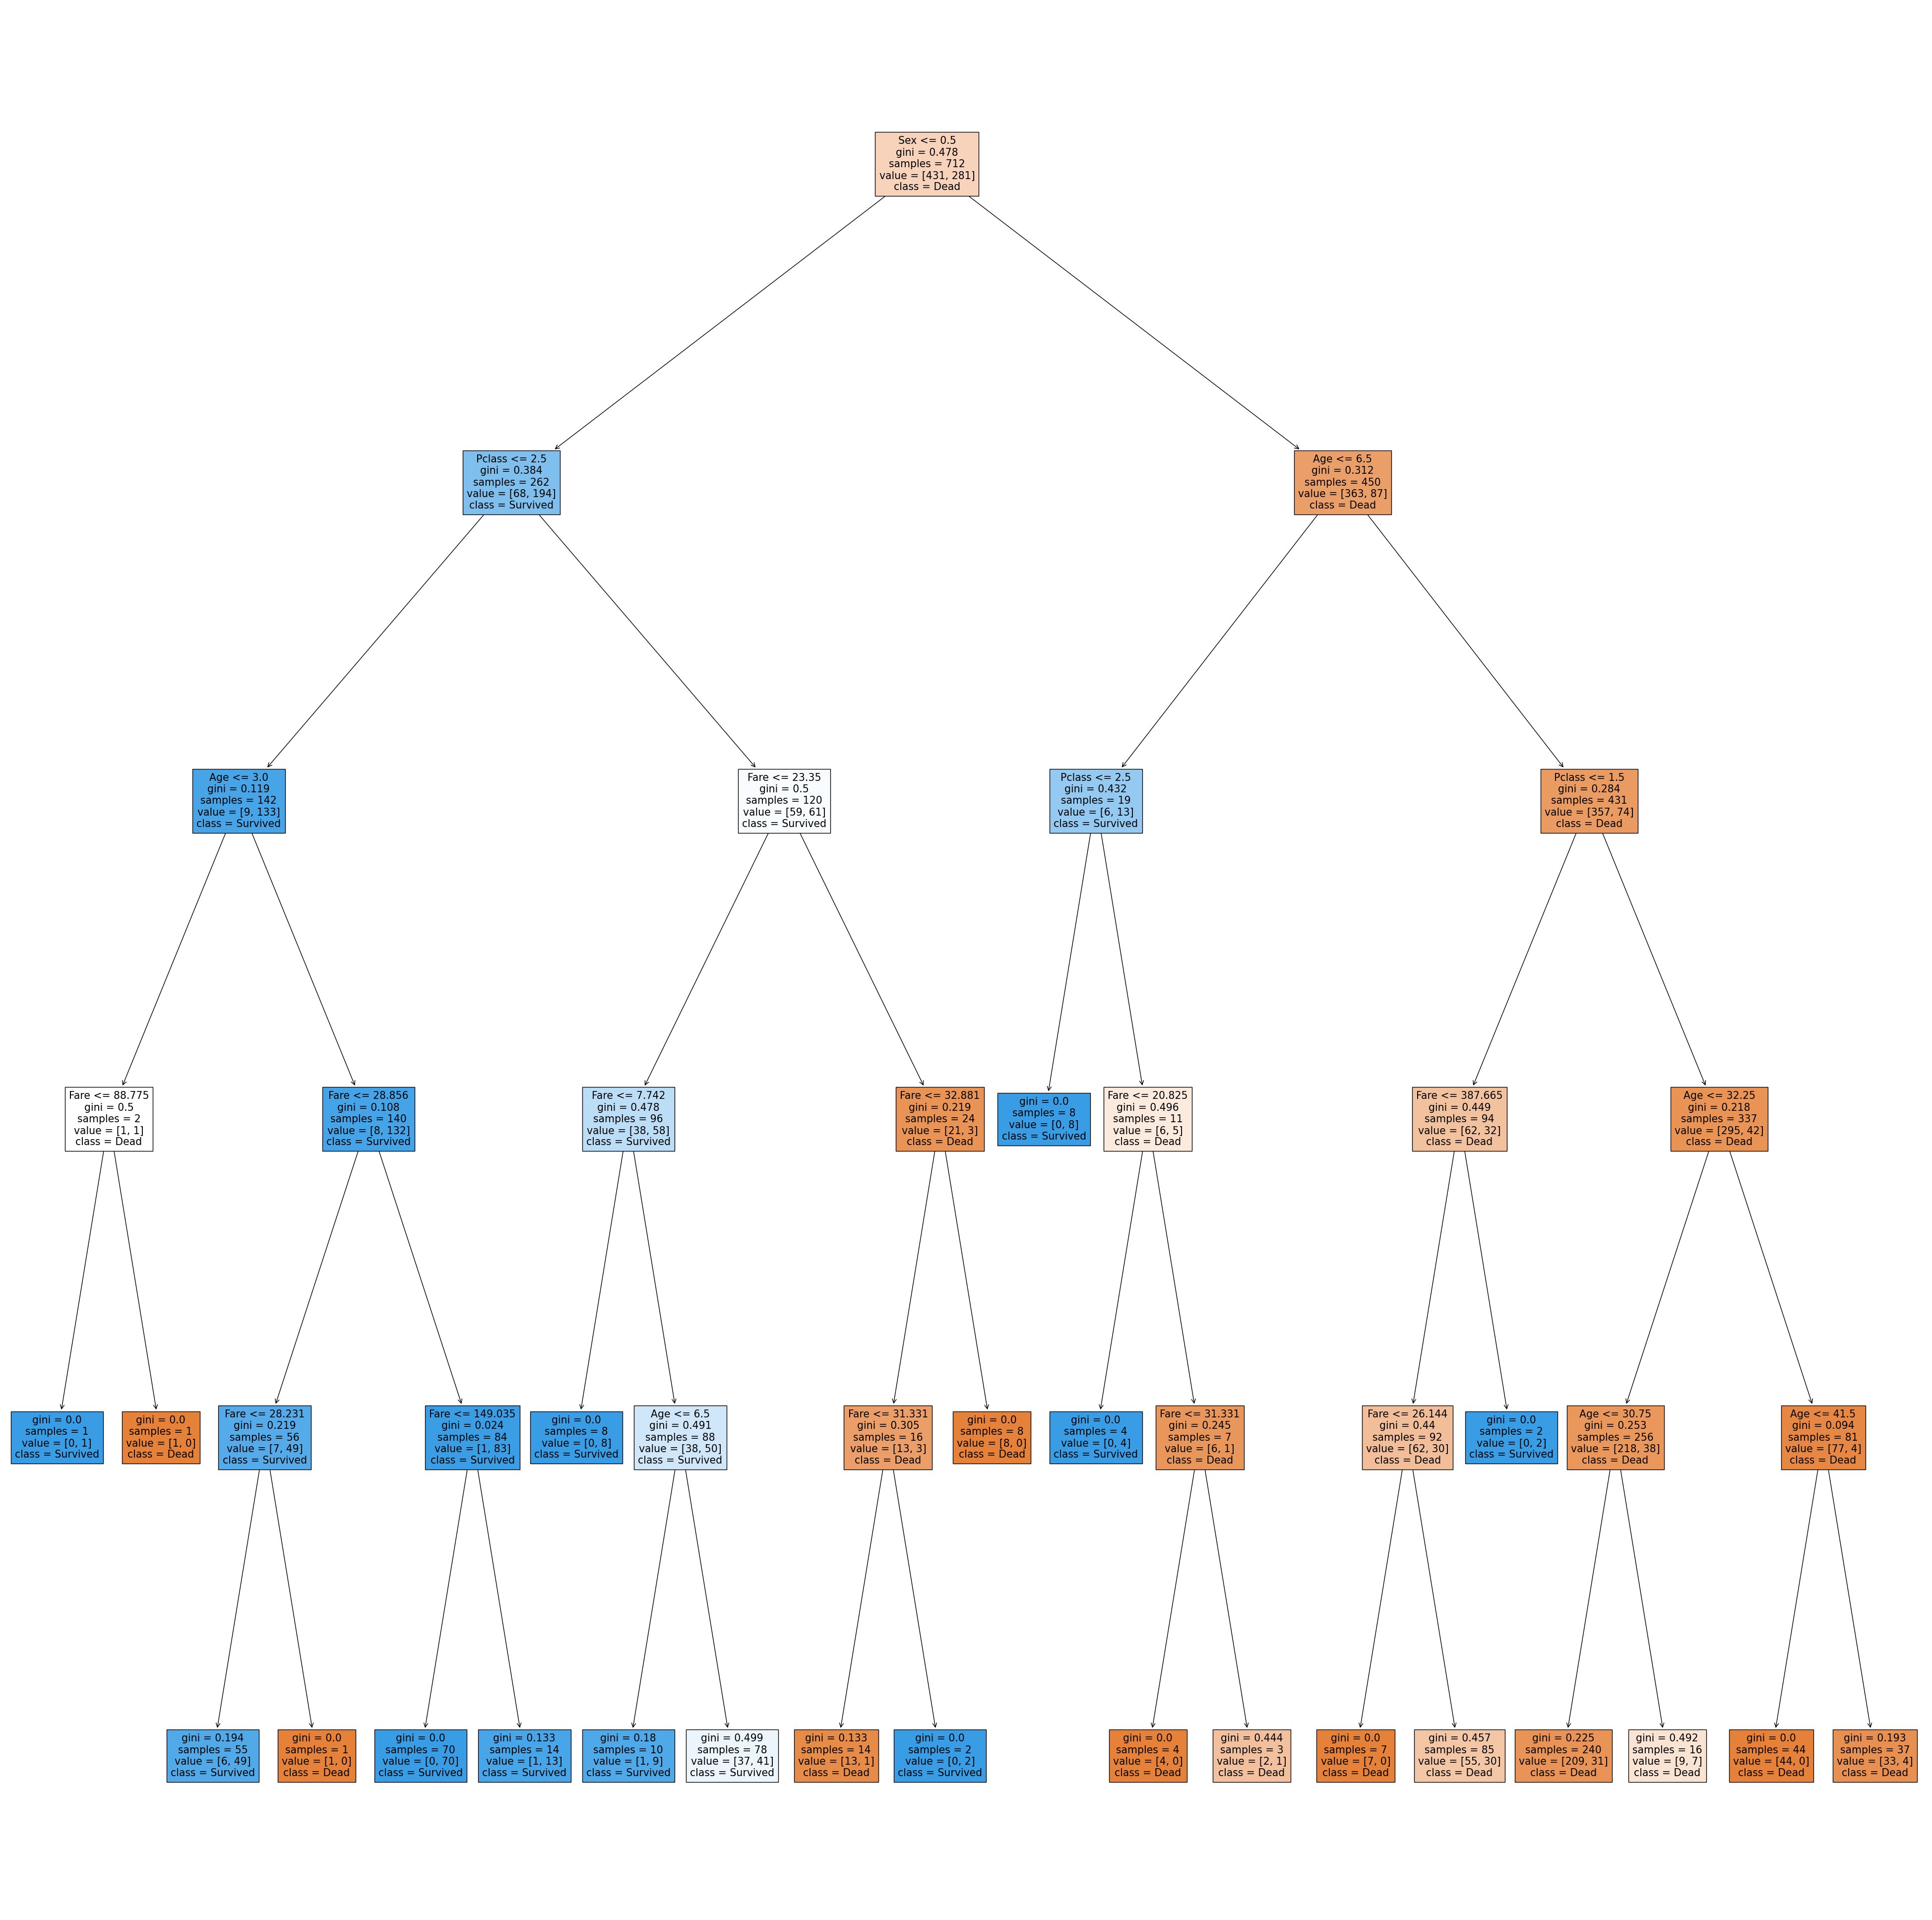

In [21]:
from sklearn import tree
fig= plt.figure(figsize=(50,50))
features= X.columns
classes= ['Dead','Survived']
tree.plot_tree(model,feature_names=features,class_names=classes,filled= True)
plt.show()

# using KNN algorithm in titanic dataset

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model= KNeighborsClassifier()
model.fit(x_tr,y_tr)
y_prd= model.predict(x_ts)
print("Accuracy of K:",accuracy_score(y_ts,y_prd)*100)

Accuracy of K: 70.94972067039106


In [24]:
accu=[]
for i in range (2,26):
    cls= KNeighborsClassifier(n_neighbors=i)
    cls.fit(x_tr,y_tr)
    y_prd=cls.predict(x_ts)
    accu.append(accuracy_score(y_ts,y_prd)*100)
accu

[72.62569832402235,
 73.74301675977654,
 72.62569832402235,
 70.94972067039106,
 74.30167597765363,
 71.50837988826815,
 74.86033519553072,
 73.74301675977654,
 75.97765363128491,
 74.86033519553072,
 77.6536312849162,
 75.41899441340783,
 76.53631284916202,
 74.86033519553072,
 75.41899441340783,
 74.86033519553072,
 75.97765363128491,
 76.53631284916202,
 75.97765363128491,
 74.30167597765363,
 75.41899441340783,
 75.41899441340783,
 74.30167597765363,
 74.86033519553072]

In [25]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_ts)
print('Accuracy of SVM is:', accuracy_score(y_ts, y_pred)*100)

Accuracy of SVM is: 72.62569832402235


In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
model = GaussianNB()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_ts)
print('Accuracy of GNB is:', accuracy_score(y_ts, y_pred)*100)

Accuracy of GNB is: 81.00558659217877
